In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000357301"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000357301
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,TRUSTCO BANK CORP N Y
Ticker,TRST


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,23.0,4.367391e+00,4.894823e-01,3.48,4.0,4.51,4.745000e+00,5.18
interest income,46.0,4.095309e+07,2.545464e+06,37331000.00,39387250.0,40179500.00,4.191225e+07,47750000.00
net income,46.0,9.968196e+06,2.439139e+06,5380000.00,8421750.0,9784500.00,1.078025e+07,16033000.00
net interest income,46.0,3.371737e+07,4.684727e+06,23473000.00,31866500.0,34169000.00,3.628975e+07,40739000.00
provision for loan losses,46.0,2.052391e+06,1.767634e+06,300000.00,712500.0,1500000.00,3.000000e+06,7100000.00


# Plots

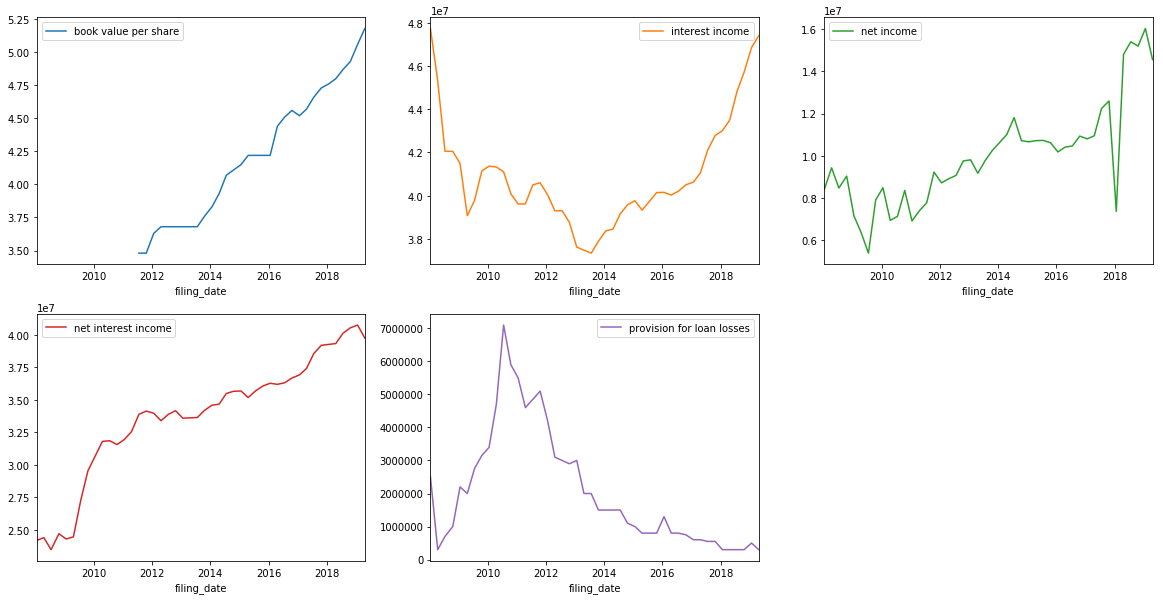

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period msg_type  \
cik        item                                                          
0000357301 book value per share  2007Q4 to 2011Q1: 14 periods  missing   
           book value per share                        2011Q3  missing   
           book value per share   2012Q2 to 2013Q2: 5 periods  missing   
           book value per share   2015Q2 to 2015Q4: 3 periods  missing   
           total revenue                                 None    empty   

                                            message  
cik        item                                      
0000357301 book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           book value per share      Missing period  
           total revenue         No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()